**Importing necessary modules**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

**Loading and exploring the dataset**

In [ ]:
df = pd.read_csv('/content/Traffic24.csv')
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:45:00 PM,20,Friday,127,54,6,2,214,heavy
1,12:15:00 PM,19,Thursday,53,6,14,24,86,normal
2,12:30:00 PM,20,Friday,158,40,5,2,211,heavy
3,11:00:00 PM,23,Monday,11,1,0,17,32,normal
4,9:00:00 AM,21,Sunday,100,15,28,5,154,high


**Exploring dataset properties**

In [ ]:
df.shape

(200000, 9)

In [ ]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Time               200000 non-null  object
 1   Date               200000 non-null  int64 
 2   Day of the week    200000 non-null  object
 3   CarCount           200000 non-null  int64 
 4   BikeCount          200000 non-null  int64 
 5   BusCount           200000 non-null  int64 
 6   TruckCount         200000 non-null  int64 
 7   Total              200000 non-null  int64 
 8   Traffic Situation  200000 non-null  object
dtypes: int64(6), object(3)
memory usage: 13.7+ MB


In [ ]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,16.005270,68.239810,14.548430,15.393805,15.635655,114.287130
std,8.981367,45.156333,12.205086,14.528424,10.722133,59.366404
min,1.000000,7.000000,0.000000,0.000000,0.000000,24.000000
25%,8.000000,20.000000,5.000000,1.000000,6.000000,56.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,106.000000,22.000000,26.000000,24.000000,164.000000
max,31.000000,179.000000,68.000000,50.000000,40.000000,262.000000


In [ ]:
df.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [ ]:
df.dtypes

Time                 object
Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object

**Data visualization**

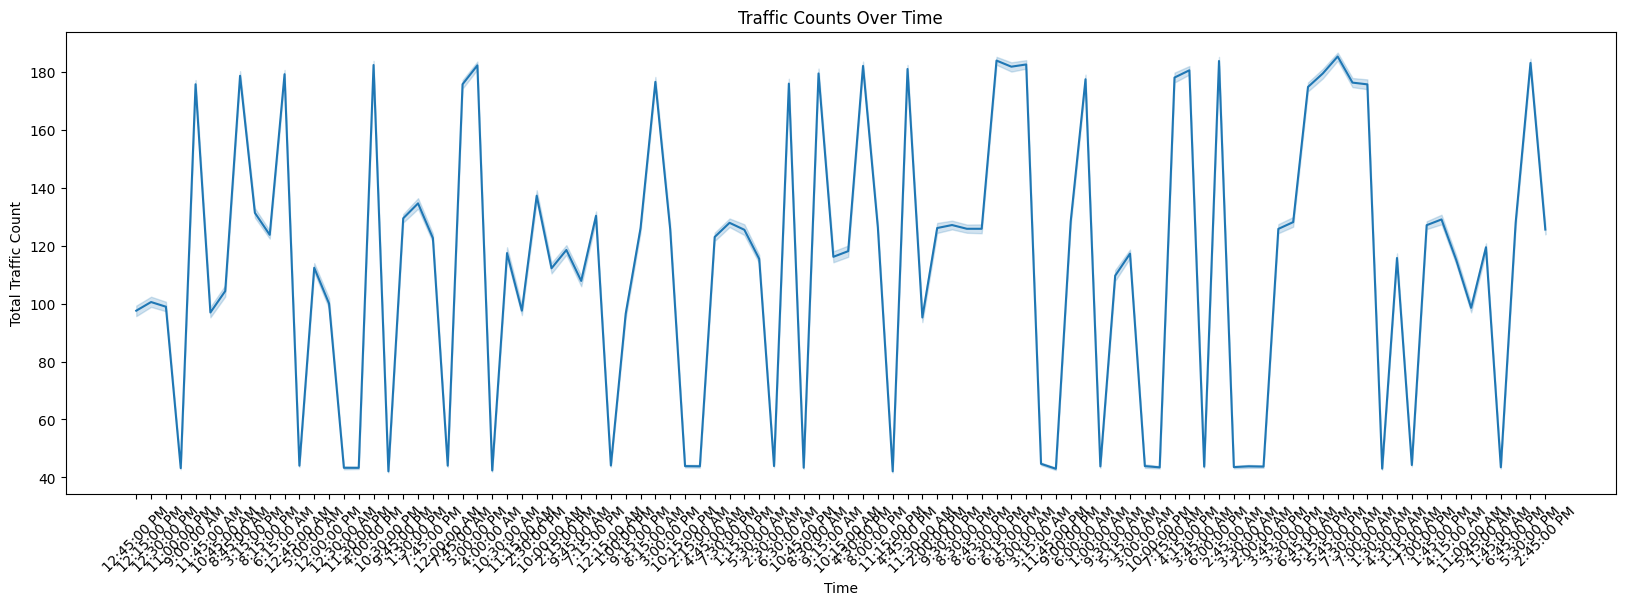

In [ ]:
# Line Plot for Traffic Counts Over Time
plt.figure(figsize=(20, 6))
sns.lineplot(x='Time', y='Total', data=df)
plt.title('Traffic Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Total Traffic Count')
plt.xticks(rotation=45)
plt.show()

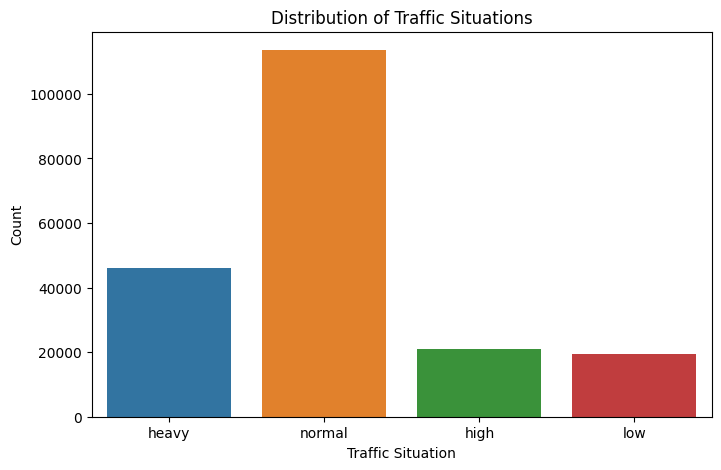

In [ ]:
# Bar Plot for Traffic Situation Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Traffic Situation', data=df)
plt.title('Distribution of Traffic Situations')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()

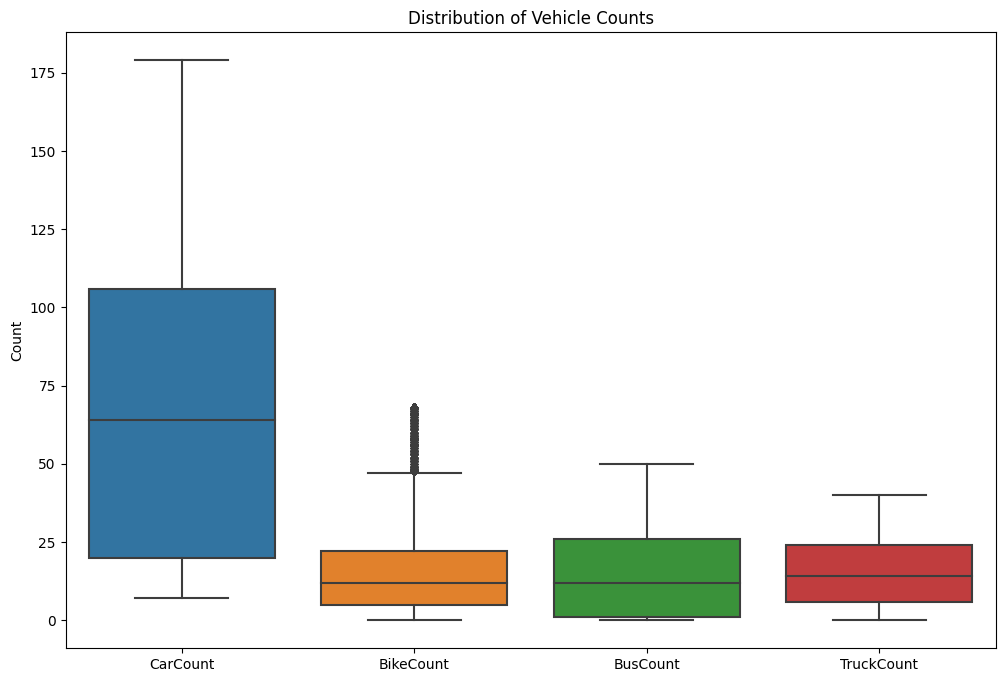

In [ ]:
# Boxplot for Vehicle Counts
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']])
plt.title('Distribution of Vehicle Counts')
plt.ylabel('Count')
plt.show()

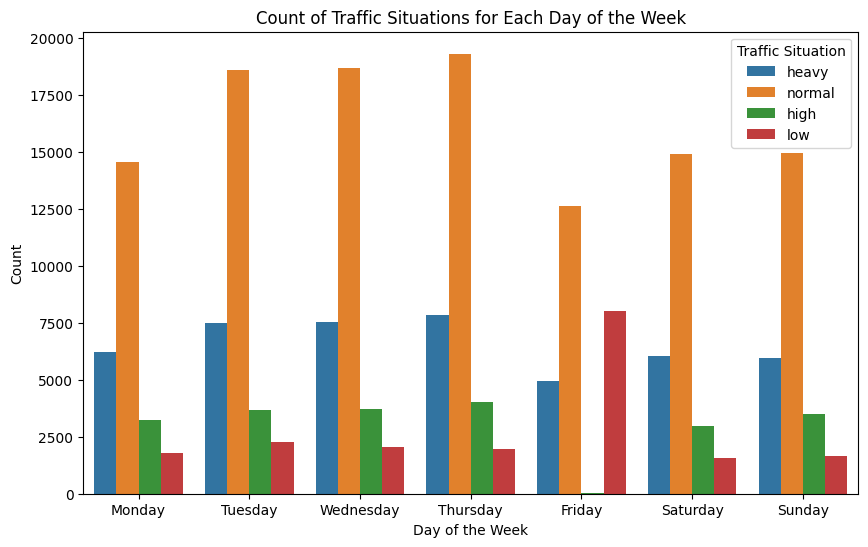

In [ ]:
# Grouped Bar Chart for Traffic Situations by Day of the Week
df['Day of the week'] = pd.Categorical(df['Day of the week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
plt.figure(figsize=(10, 6))
sns.countplot(x='Day of the week', hue='Traffic Situation', data=df, order=df['Day of the week'].cat.categories)
plt.title('Count of Traffic Situations for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Traffic Situation', loc='upper right')
plt.show()

<ipython-input-201-1db1e2f2666e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


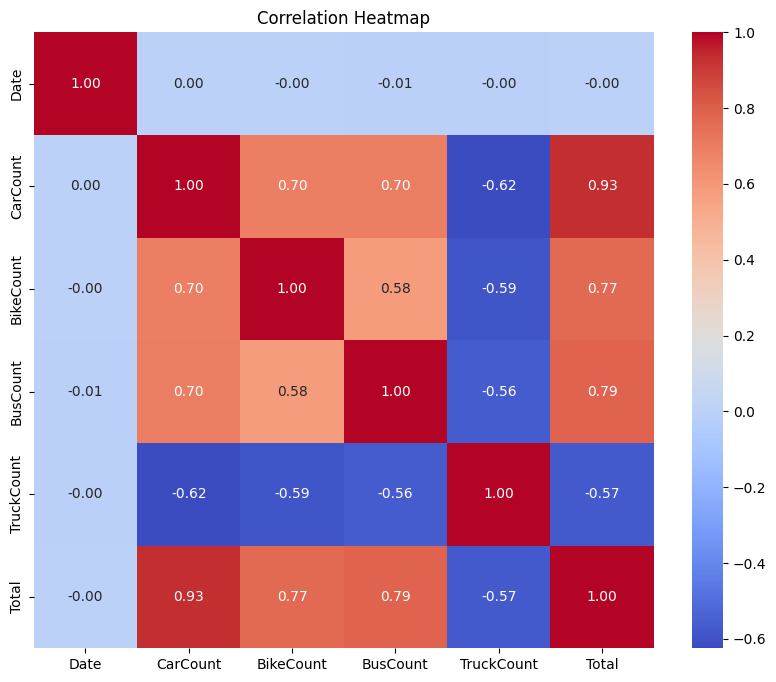

In [ ]:
# Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Data Preprocessing**

In [ ]:
# Replace string values of 'Day of the week' and 'Traffic Situation' using integers
df['Day of the week'] = df['Day of the week'].replace({'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7})
df['Traffic Situation'] = df['Traffic Situation'].replace({'low': 0, 'normal': 1, 'high': 2, 'heavy': 3})

In [ ]:
df.sample(5)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
47031,2:45:00 AM,4,6,20,4,1,23,49,1
158575,1:45:00 PM,5,7,75,7,38,16,141,2
40532,8:00:00 AM,12,4,144,32,37,0,204,3
199746,10:00:00 PM,20,5,13,1,0,27,47,1
172004,8:45:00 AM,1,3,126,24,37,8,185,3


In [ ]:
df.drop(['Total', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount'], axis=1, inplace=True)
df.head()

,Time,Date,Day of the week,Traffic Situation
0,12:45:00 PM,20,5,3
1,12:15:00 PM,19,4,1
2,12:30:00 PM,20,5,3
3,11:00:00 PM,23,1,1
4,9:00:00 AM,21,7,2


In [ ]:
df.isna().sum()

Time                 0
Date                 0
Day of the week      0
Traffic Situation    0
dtype: int64

In [ ]:
# Function Declaration for converting 'Time' to seconds since midnight
def time2sec(time):
    # Your input time string
    time_str = time

    # Convert the time string to a datetime object
    time_obj = datetime.strptime(time_str, '%I:%M:%S %p')

    # Extract the time in seconds since midnight
    time_in_seconds = time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second

    # You can use 'time_in_seconds' in your machine learning algorithm
    return(time_in_seconds)

In [ ]:
# Convert 'Time' to seconds since midnight
df['Time'] = df['Time'].apply(lambda x: time2sec(x))
df.head()

,Time,Date,Day of the week,Traffic Situation
0,45900,20,5,3
1,44100,19,4,1
2,45000,20,5,3
3,82800,23,1,1
4,32400,21,7,2


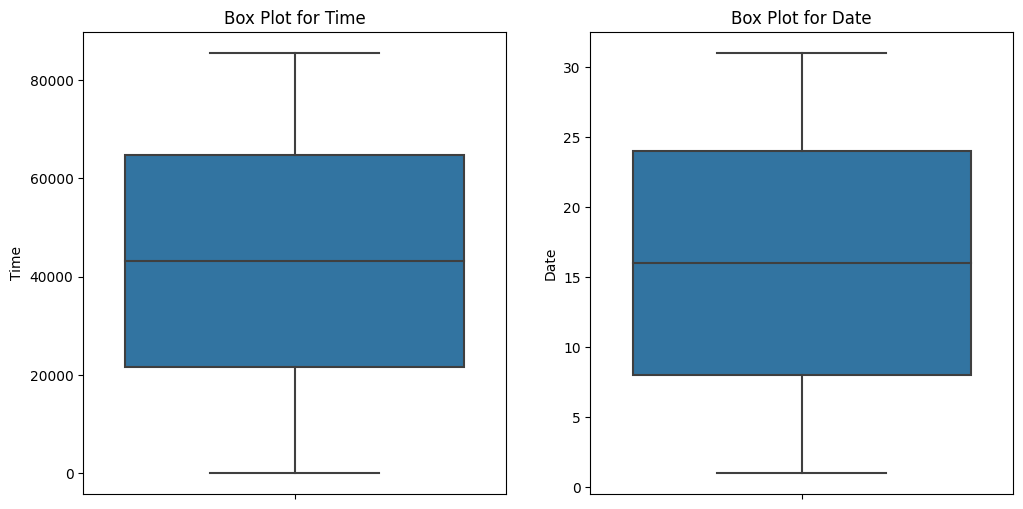

In [ ]:
# Box plots for 'Time' and 'Date'
plt.figure(figsize=(12, 6))

# Box plot for 'Time'
plt.subplot(1, 2, 1)
sns.boxplot(y='Time', data=df)
plt.title('Box Plot for Time')

# Box plot for 'Date'
plt.subplot(1, 2, 2)
sns.boxplot(y='Date', data=df)
plt.title('Box Plot for Date')

plt.show()


In [ ]:
X = df[["Time", "Date", "Day of the week"]]
Y = df[["Traffic Situation"]]

In [ ]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [ ]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [ ]:
x_train.shape,y_test.shape

((180000, 3), (20000, 1))

**Model Creation - Decision Tree**

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred_DT = DT.predict(x_test)

**Model Evaluation - Decision Tree**

In [ ]:
cm_DT = confusion_matrix(y_test, y_pred_DT)
accuracy_DT = accuracy_score(y_test, y_pred_DT)

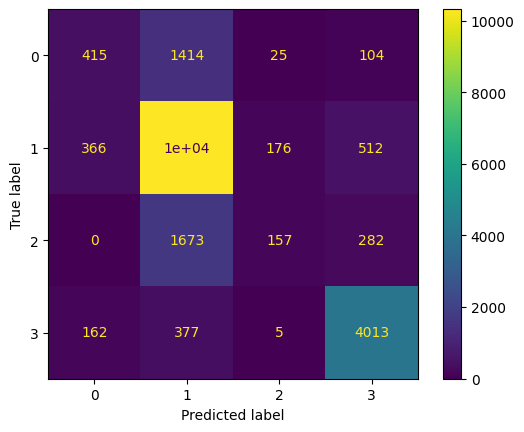

In [ ]:
# Confusion Matrix Display
ConfusionMatrixDisplay(cm_DT).plot()

**Model Creation - Random Forest**

In [ ]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_RF = RF.predict(x_test)

<ipython-input-217-92ee4f321328>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(x_train, y_train)


**Model Evaluation - Random Forest**

In [ ]:
cm_RF = confusion_matrix(y_test, y_pred_RF)
accuracy_RF = accuracy_score(y_test, y_pred_RF)

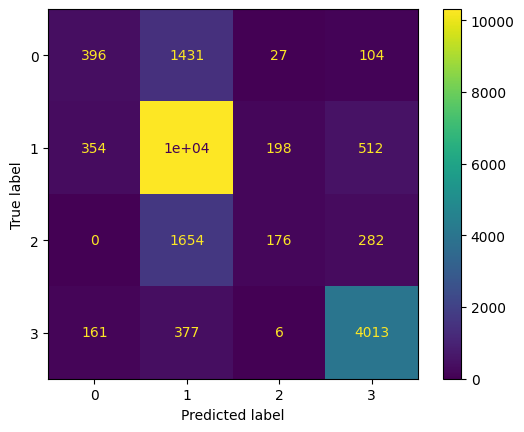

In [ ]:
# Confusion Matrix Display
ConfusionMatrixDisplay(cm_RF).plot()

**Displaying results**

In [ ]:
result_DT = pd.DataFrame({"Original": y_test["Traffic Situation"], "Prediction_DT": y_pred_DT})
result_RF = pd.DataFrame({"Original": y_test["Traffic Situation"], "Prediction_RF": y_pred_RF})

In [ ]:
print(result_DT.head())


        Original  Prediction_DT
77533          3              3
157462         1              1
192246         1              1
177927         3              3
138973         3              3


In [ ]:
print(result_RF.head())

        Original  Prediction_RF
77533          3              3
157462         1              1
192246         1              1
177927         3              3
138973         3              3


In [ ]:
# Displaying accuracy
print(f"Decision Tree Accuracy: {accuracy_DT:.2%}")
print(f"Random Forest Accuracy: {accuracy_RF:.2%}")

Decision Tree Accuracy: 74.52%
Random Forest Accuracy: 74.47%
